<h3>Support Vector Machine</h3>

SVM, also support-vector networks are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis

SVM classifier as fitting the widest possible street(represented by the parallel dashed lines) between the classes. This is called large margin classification.

<b>Few applications</b>
<li>SVMs are helpful in text and hypertext categorization, as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive setting.
<li>Classification of images
<li>Hand-written characters recognization. 
        
<b>SVM are sensitives to the feature scales</b>
    
<h3>Cases of SVM</h3>
    
<b>Hard Margin</b> 
   
Training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible
    
<b> Soft Margin</b>   

Keeping the street as large as possible and limiting the margin violations.    
      
    
<h3> Kernels </h3>
    
<li><b>Linear Kernel:</b> A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.   
    
<li><b>Polynomial Kernel:</b> A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.    
    d is the degree of the polynomial
   
<li><b>Radial Basis Function Kernel:</b> The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
    
Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

    
    
    
    
<h3>Tuning Hyperparameters</h3>
    
<li><b>Kernel:</b> The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

<li><b>Regularization:</b> Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

    
<li><b>Gamma:</b> A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of high gamma considers all the data points in the calculation of the separation line.    
       

In [1]:
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y= (iris['target']==2).astype(np.float64)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = SVC(kernel='linear')
model.fit(X_train,y_train)
model.score(X_test,y_test)

1.0

<h3> Polynomial Kernal </h3>

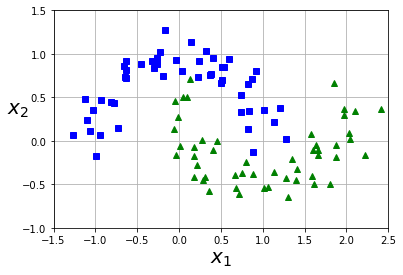

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])    
    




In [5]:
from sklearn.datasets.samples_generator import make_blobs

X,y = make_blobs(n_samples=125,centers=2,cluster_std=0.6,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
len(y)

125

In [7]:
train_X, test_X , train_y, test_y = train_test_split(X,y, test_size=20, random_state=0) 

svc= SVC(kernel='linear')
svc.fit(train_X,train_y)


SVC(kernel='linear')

In [8]:
plt.scatter(train_X[:,0],train_X[:,1],c=train_y,cmap="winter")

ax = plt.gca()

xlim = ax.get_lim()

w= svc.coef_[0]

a= -w[0]/




SyntaxError: invalid syntax (<ipython-input-8-a7c538802fff>, line 9)

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC

poly_kernal_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

poly_kernal_svm_clf.fit(X, y)

In [ ]:
#poly_kernal_svm_clf.fit(X, y)

import numpy as np

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_kernal_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])




In [ ]:
axes = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]
y_pred = poly_kernal_svm_clf.predict(X).reshape(x0.shape)
y_decision = poly_kernal_svm_clf.decision_function(X).reshape(x0.shape)
plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [ ]:
y_decision